In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, rand_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler ,  PowerTransformer

from jenkspy import JenksNaturalBreaks
from yellowbrick.cluster import KElbowVisualizer

In [2]:
df = pd.read_csv("Data/insurance.csv")
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [24]:
X = ["age","sex","bmi","children","smoker","region","charges"]

In [25]:
#Label Encoder
label_encoder = LabelEncoder()

df["sex"]= label_encoder.fit_transform(df["sex"])
df["sex"].unique()

df["smoker"]= label_encoder.fit_transform(df["smoker"])
df["smoker"].unique()

df["region"]= label_encoder.fit_transform(df["region"])
df["region"].unique()

array([3, 2, 1, 0], dtype=int64)

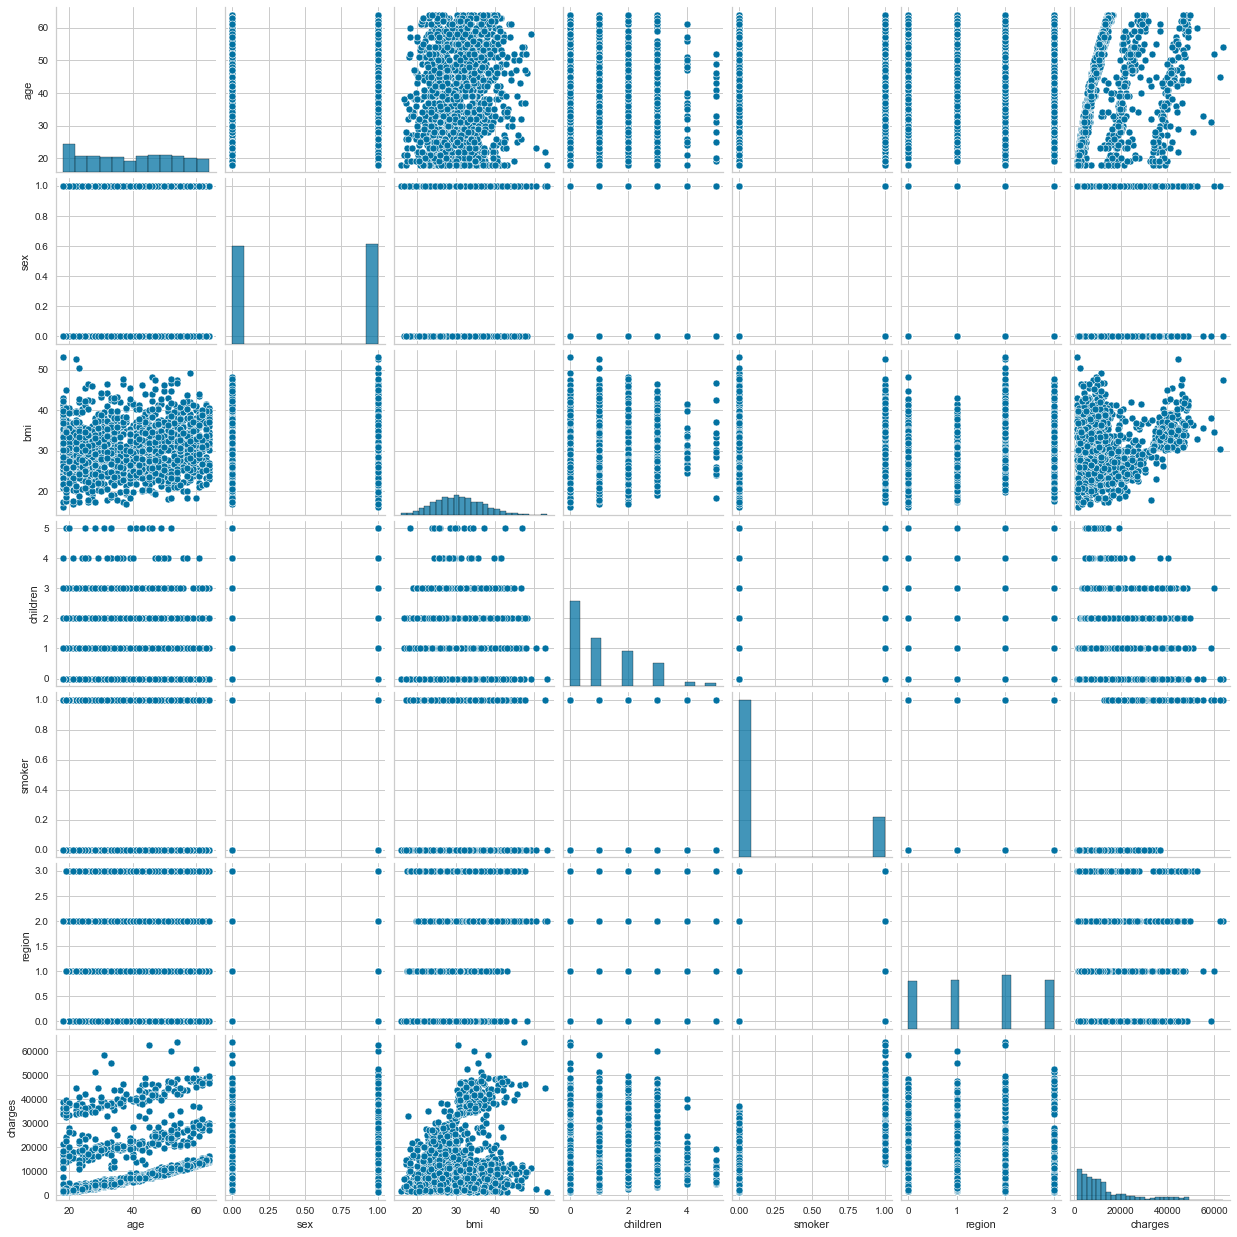

In [26]:
sns.pairplot(df)

# K-Means Clustering

In [27]:
#Elbow Method

def elbow_method(data):
    Elbow_M = KElbowVisualizer(KMeans(), locate_elbow=True, metric = 'silhouette')
    Elbow_M.fit(data)
    Elbow_M.show()
    return

In [28]:
# Function for Plotting Clusters
def plot_clusters(n, cluster_pred_values,data):
    for x in range(n):
        cname = "cluster " + str(x)
        plt.scatter(
            data[cluster_pred_values == x, 0], data[cluster_pred_values == x, 1],
            s=50, c=np.random.rand(3,),
            edgecolor='black',
            label= cname)

In [29]:
# Function for Plotting Centroid (K-Means)
def plot_centroids(km_model):
    plt.scatter(
    km_model.cluster_centers_[:, 0], km_model.cluster_centers_[:, 1],
    s=100, marker='o',
    c='black', edgecolor='black',
    label='centroids')

In [30]:
def k_means_clustering(n_clust,data):
    km = KMeans(n_clusters= n_clust, init='random',
           n_init=10, max_iter=300,
            tol=1e-04, random_state=0)
    
    km_predict = km.fit_predict(data)
    
    # Silhouette Score
    s_score = silhouette_score(data, km.labels_, metric = 'euclidean')
    print('Silhouette Score for',n_clust,'Cluster K-Means Clustering:', s_score)
    
    #plot the data
    plot_clusters(n_clust, km_predict, data)
    plot_centroids(km)
    plt.legend(scatterpoints=1,loc = (1.1,0.5))
    plt.show()

# Jenks NaturalNetwork

In [31]:
jnb = JenksNaturalBreaks()

In [32]:
def jnb_clustering(n_clust,data,X):
    s = dict()
    for i in range(0,len(X)):
        #fit the model
        jnb.fit(data[:,i])
        
        # Silhouette Score
        s_score = silhouette_score(data, jnb.labels_, metric = 'euclidean')
        s[X[i]] = s_score
        print('Silhouette Score for',X[i],'- JNB Clustering:', s_score)
        
        #plot the clustering
        plot_clusters(n_clust, jnb.labels_,data)
        plt.legend(scatterpoints=1,loc = (1.1,0.5))
        plt.show()
        
    return(sorted(s.items(), key=lambda kv: (kv[1], kv[0])))

In [33]:
def k_means_clust(n_clust,data):
    km = KMeans(n_clusters= n_clust, init='random',
           n_init=10, max_iter=300,
            tol=1e-04, random_state=0)
    
    km_predict = km.fit_predict(data)
    
    # Silhouette Score
    s_score = silhouette_score(data, km.labels_, metric = 'euclidean')
    return(s_score)

In [34]:
data = df[X].to_numpy()
data

array([[1.90000000e+01, 0.00000000e+00, 2.79000000e+01, ...,
        1.00000000e+00, 3.00000000e+00, 1.68849240e+04],
       [1.80000000e+01, 1.00000000e+00, 3.37700000e+01, ...,
        0.00000000e+00, 2.00000000e+00, 1.72555230e+03],
       [2.80000000e+01, 1.00000000e+00, 3.30000000e+01, ...,
        0.00000000e+00, 2.00000000e+00, 4.44946200e+03],
       ...,
       [1.80000000e+01, 0.00000000e+00, 3.68500000e+01, ...,
        0.00000000e+00, 2.00000000e+00, 1.62983350e+03],
       [2.10000000e+01, 0.00000000e+00, 2.58000000e+01, ...,
        0.00000000e+00, 3.00000000e+00, 2.00794500e+03],
       [6.10000000e+01, 0.00000000e+00, 2.90700000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 2.91413603e+04]])

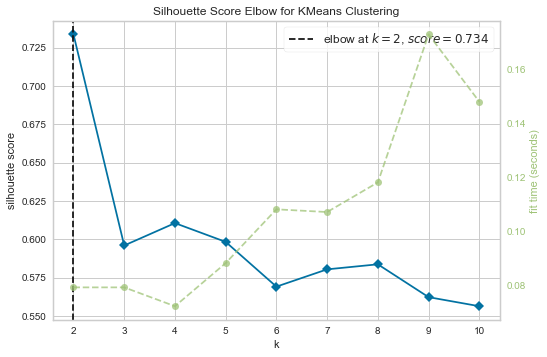

In [35]:
elbow_method(df[X])

Silhouette Score for 2 Cluster K-Means Clustering: 0.7335567664668805


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


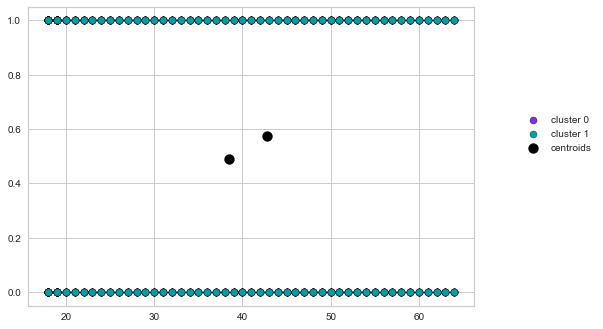

In [36]:
s = k_means_clustering(2,data)